<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Ход-работы" data-toc-modified-id="Ход-работы-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><strong>Ход работы</strong></a></span></li></ul></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Обозначения для удобства:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### **Ход работы**

1. Получение данных и первичный осмотр данных.
2. Предобработка данных: 
* поиск дубликатов, пропусков, аномалий. 
* Исправление, удаление данных. 
3. Добавление в датасет новых показателей: 
* цена квадратного метра; 
* день недели, месяц и год публикации объявления; 
* этаж квартиры; варианты — первый, последний, другой; 
* соотношение жилой и общей площади, а также отношение площади кухни к общей.
4. Исследовательский анализ: 
* анализ всего датасета, выявление зависимости цены от показателей квартиры;
* анализ квартир, находящихся в центре Санкт-Петербурга. 
5. Общие выводы по проекту. 

## Изучение данных из файла

In [1]:
import pandas as pd #импорт библиотеки
import matplotlib.pyplot as plt #импорт библиотеки

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #чтение файла
pd.set_option('display.max_columns', 50) #вывод всех столбцов датасета
pd.options.display.float_format = '{:,.2f}'.format #избавление от экспоненты

display(df.info()) #основная информация о датасете
display(df.describe()) #краткая информация о датасете
display(df.head()) #первые 5 строк датасета
display(df.tail()) #последние 5 строк датасета
display('#количество пропусков в датасете',
        df.isna().sum()) #количество пропусков в датасете
display('#процент пропусков от всего датасета',
        df.isna().mean().sort_values(ascending=False)*100) #процент пропусков от всего датасета
display('#кол-во явных дубликатов',
        df.duplicated().sum()) #кол-во явных дубликатов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,NaN
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,False,False,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00
23698,4,"1,350,000.00",32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'#количество пропусков в датасете'

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

'#процент пропусков от всего датасета'

is_apartment           88.29
parks_nearest          65.91
ponds_nearest          61.56
balcony                48.61
ceiling_height         38.80
airports_nearest       23.38
cityCenters_nearest    23.29
ponds_around3000       23.28
parks_around3000       23.28
days_exposition        13.42
kitchen_area            9.61
living_area             8.03
floors_total            0.36
locality_name           0.21
total_images            0.00
last_price              0.00
studio                  0.00
floor                   0.00
rooms                   0.00
first_day_exposition    0.00
total_area              0.00
open_plan               0.00
dtype: float64

'#кол-во явных дубликатов'

0

### Вывод

**Об info()**
1. Некоторые столбцы имеют неправильный тип данных (к примеру столбец "is_apartment" должен содержать значения типа bool, а 'first_day_exposition' datetime). 
2. Есть много пропусков в датасете. 
3. Неправильные названия столбцов (к примеру столбец "cityCenters_nearest" не имеет вида snake_case)

**О describe**
1. Наблюдаются странные данные (к примеру минимальное значение потолка 1 метр, а максимальное 100 метров – выглядит неправдоподбно.) 

**О head & tail**
1. Имеется округленное время, но записано неправильным типом.
2. Наблюдается большое кол-во пропусков с первых строк датасета. 

**О пропусках**
1. В датасете содержится большое кол-во пропусков, в некоторых столбцах процент пропусков доходит до 88,29%. 
2. Кол-во столбцов с пропусками = 14. 

**Явных дубликатов в датасете не наблюдается**

## Предобработка данных

In [3]:
presorted_local_name = set(df['locality_name'].unique()) #уникальные значения
#в алфавитном порядке для столбца "locality_name"
display(df.locality_name.nunique()) #кол-во значений в столбце
display(presorted_local_name)


364

{nan,
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'г

В столбце имеются неявные дубликаты (к примеру 'городской посёлок Рощино', 'поселок городского типа Рощино', 'посёлок городского типа Рощино', 'городской посёлок Рощино'), их необходимо обработать. 

In [4]:
df.locality_name = df.locality_name.str.replace(
    'ё', 'е') #замена буквы "ё" на "е"
df.locality_name = df.locality_name.str.replace(
    'поселок городского типа', 'поселок') #замена на однотипные значнеия
df.locality_name = df.locality_name.str.replace(
    'городской поселок', 'поселок') #замена на однотипные значнеия

sorted_locality_name = set(df['locality_name'].unique()) #уникальные значения
#в алфавитном порядке
display(len(sorted_locality_name)) #кол-во уникальных значений после удаления дубликатов

display(sorted_locality_name) #проверка


323

{nan,
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинк

Столбец "first_day_exposition" необходимо преобразовать в datetime, так как данные округлены до дней, то сохраним в датасете дни. 

In [5]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
display(df['first_day_exposition'].head())
df.head() #проверка

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


Отлично, теперь имеется более удобный вид даты и тип данных изменен на datetime64.
Перейдем к обработке потолков.

'#кол-во пропусков'

9195

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

'#медиана высоты потолков'

2.65

'количество квартир имеющих потолки выше 4 метров'

75

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


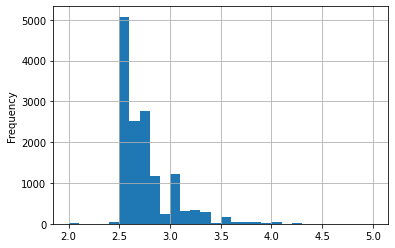

In [6]:
display('#кол-во пропусков',df.ceiling_height.isna().sum()) #кол-во пропусков
display(df['ceiling_height'].value_counts()) #кол-во квартир с потолками равными...
display(df['ceiling_height'].describe()) #краткая информация по столбцу "ceiling_height"
ceiling_height_median = df['ceiling_height'].median() #медиана высоты потолков
display('#медиана высоты потолков',ceiling_height_median)
display('количество квартир имеющих потолки выше 4 метров',
        len(df[df['ceiling_height'] > 4].sort_values('ceiling_height')))
df['ceiling_height'].sort_values().plot(
    y='ceiling_height', 
    kind='hist', 
    bins=30, 
    range=(2,5),
    grid=True)
df['ceiling_height'].loc[df['ceiling_height'].isna()] = ceiling_height_median #замена пропусков медианным значением

In [7]:
df['ceiling_height'].isna().sum() #проверка пропущенных значений 

0

In [8]:
df.head() #проверка на замену значений

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,1,NaN,False,False,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


Осуществлена замена пропусков в колонке "ceiling_height" на медианные значения, так как в датасете есть 75 аномалий. 

In [9]:
display('#количество пропусков в датасете',
        df.isna().sum())

'#количество пропусков в датасете'

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Обработаем пропуски в living_area опираясь на стоимость других квартир. 

In [10]:
df['living_area'].isna().sum()#кол-во пропусков

1903

In [11]:
df['living_area'].describe()

count   21,796.00
mean        34.46
std         22.03
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

In [12]:
df.query('living_area < total_area/2') #кол-во квартир, где жилая площадь вдвое 
#меньше общей площади квартиры

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,1,NaN,False,False,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12.00,14.40,5,NaN,False,False,9.10,NaN,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02,1,2.65,26.00,10.60,6,NaN,False,False,14.40,1.00,поселок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23676,19,"3,550,000.00",36.40,2016-06-08,1,2.65,16.00,14.90,13,NaN,False,False,9.30,0.00,Санкт-Петербург,"32,228.00","11,884.00",1.00,701.00,0.00,NaN,70.00
23682,11,"2,350,000.00",35.60,2016-06-23,1,2.50,5.00,17.00,4,False,False,False,8.30,2.00,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.00
23684,20,"21,400,000.00",145.00,2018-11-02,4,3.00,26.00,71.40,17,NaN,False,False,15.60,NaN,Санкт-Петербург,"11,827.00","11,459.00",0.00,NaN,0.00,NaN,NaN
23689,13,"3,550,000.00",35.30,2018-02-28,1,2.86,15.00,16.30,4,NaN,False,False,9.10,2.00,Санкт-Петербург,"17,284.00","16,081.00",1.00,353.00,2.00,652.00,29.00


In [13]:
df.groupby('living_area')['last_price'].describe()

,count,mean,std,min,25%,50%,75%,max
living_area,,,,,,,,
2.00,2.00,"4,340,000.00","2,842,569.26","2,330,000.00","3,335,000.00","4,340,000.00","5,345,000.00","6,350,000.00"
3.00,2.00,"34,715,000.00","42,815,315.60","4,440,000.00","19,577,500.00","34,715,000.00","49,852,500.00","64,990,000.00"
5.00,1.00,"2,680,000.00",NaN,"2,680,000.00","2,680,000.00","2,680,000.00","2,680,000.00","2,680,000.00"
5.40,1.00,"6,100,000.00",NaN,"6,100,000.00","6,100,000.00","6,100,000.00","6,100,000.00","6,100,000.00"
6.00,1.00,"3,799,000.00",NaN,"3,799,000.00","3,799,000.00","3,799,000.00","3,799,000.00","3,799,000.00"
...,...,...,...,...,...,...,...,...
322.30,1.00,"140,000,000.00",NaN,"140,000,000.00","140,000,000.00","140,000,000.00","140,000,000.00","140,000,000.00"
332.00,1.00,"50,000,000.00",NaN,"50,000,000.00","50,000,000.00","50,000,000.00","50,000,000.00","50,000,000.00"
347.50,1.00,"91,500,000.00",NaN,"91,500,000.00","91,500,000.00","91,500,000.00","91,500,000.00","91,500,000.00"


In [14]:
df['living_area'].isna().mean()*100 

8.029874678256467

Пропущенные значения в living_area составляют всего 8 процентов от всего датасета и значения столбца бывают непредсказуемы. К примеру, кол-во квартир, где жилая площадь в два раза меньше общей площади квартиры равно 5611. Так что оставим эти значения в покое, исправим только попуски. 

In [15]:
display(df['locality_name'].isna().sum()) #14 пропусков в столбце с названием местоположения
#следует удалить пропуски, чтобы они не мешали при исследовании
df = df.dropna(subset=['locality_name']) #удаление пропусков
df['locality_name'].isna().sum() #проверка

49

0

In [16]:
display('#количество пропусков в датасете',
        df.isna().sum())

'#количество пропусков в датасете'

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                 11513
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [17]:
df['balcony'] = df['balcony'].fillna(0) #замена осуществлена на 0 так как
#при отстутсвии балкона человек не заполнял этот столбец
df['balcony'].isna().sum()

0

In [18]:
df['is_apartment'] = df['is_apartment'].fillna(False) #замена осуществлена на False так как
#при отстутсвии апартаментов человек не заполнял этот столбец

In [19]:
df['is_apartment'] = df['is_apartment'].astype('bool') #замена типа данных на булев, так как
#в задании написано6 что это bool тип, к тому же этот столбец отвечает на вопрос это апартаменты или нет
df['is_apartment'].value_counts()

False    23600
True        50
Name: is_apartment, dtype: int64

In [20]:
display('#количество пропусков в датасете',
        df.isna().sum())

'#количество пропусков в датасете'

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Исправим столбец с kitchen_area. Вместо пропусков вставим значение, которое является процентным соотношением total_area к kitchen_area в остальных случаях. 

In [21]:
df['ratio_kitchen'] = df['kitchen_area']/df['total_area']*100 #кол-во процентов кухни от всей площади
display(df['ratio_kitchen'].median()) #медианное значение процента
display(df['ratio_kitchen'].mean()) #среднее значение процента

17.24137931034483

18.737152810064508

Заменим пропуски в столбце kitchen_area на 18.74 процентов от общей площади в той же строке

In [22]:
def replace_kitchen(row):
    kitchen = row['kitchen_area']
    total = row['total_area']
    return row['total_area']  * df['ratio_kitchen'].mean()
df['kitchen_area'] = df.apply(replace_kitchen, axis=1)
df['kitchen_area']

0       2,023.61
1         756.98
2       1,049.28
3       2,979.21
4       1,873.72
          ...   
23694   2,507.22
23695   1,105.49
23696   1,062.40
23697   1,438.08
23698     605.21
Name: kitchen_area, Length: 23650, dtype: float64

In [23]:
display('#количество пропусков в датасете',
        df.isna().sum())

'#количество пропусков в датасете'

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
ratio_kitchen            2269
dtype: int64

In [24]:
df['ratio_living'] = df['living_area']/df['total_area']*100 #кол-во процентов living от всей площади
display(df['ratio_living'].median()) #медианное значение процента
display(df['ratio_living'].mean()) #среднее значение процента


56.785989926785035

56.47499988246564

Заменим пропуски в столбце living_area на 56,6 процентов от общей площади в той же строке

In [25]:
def replace_living(row):
    living = row['living_area']
    total = row['total_area']
    return row['total_area']  * df['ratio_living'].median()
df['living_area'] = df.apply(replace_living, axis=1)
df['living_area']

0       6,132.89
1       2,294.15
2       3,180.02
3       9,028.97
4       5,678.60
          ...   
23694   7,598.53
23695   3,350.37
23696   3,219.77
23697   4,358.32
23698   1,834.19
Name: living_area, Length: 23650, dtype: float64

In [26]:
display('#количество пропусков в датасете',
        df.isna().sum())

'#количество пропусков в датасете'

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
ratio_kitchen            2269
ratio_living             1898
dtype: int64

## Расчёты и добавление результатов в таблицу

**Добавление цены квадратного метра**

In [27]:
df['price_per_meter'] = df['last_price'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_kitchen,ratio_living,price_per_meter
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,"6,132.89",8,False,False,False,"2,023.61",0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,23.15,47.22,"120,370.37"
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,"2,294.15",1,False,False,False,756.98,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,27.23,46.04,"82,920.79"
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,"3,180.02",4,False,False,False,"1,049.28",0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,14.82,61.25,"92,785.71"
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,"9,028.97",9,False,False,False,"2,979.21",0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,NaN,NaN,"408,176.10"
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,"5,678.60",13,False,False,False,"1,873.72",0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,41.00,32.00,"100,000.00"


**Добавление: день недели, месяц и год публикации объявления**

In [28]:
df['day_of_publication'] = df['first_day_exposition'].dt.day
df['month_of_publication'] = df['first_day_exposition'].dt.month_name()
df['month_of_publication_id'] = df['first_day_exposition'].dt.month
df['year_of_publication'] = df['first_day_exposition'].dt.year

In [29]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_kitchen,ratio_living,price_per_meter,day_of_publication,month_of_publication,month_of_publication_id,year_of_publication
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,"6,132.89",8,False,False,False,"2,023.61",0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,23.15,47.22,"120,370.37",7,March,3,2019
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,"2,294.15",1,False,False,False,756.98,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,27.23,46.04,"82,920.79",4,December,12,2018
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,"3,180.02",4,False,False,False,"1,049.28",0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,14.82,61.25,"92,785.71",20,August,8,2015
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,"9,028.97",9,False,False,False,"2,979.21",0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,NaN,NaN,"408,176.10",24,July,7,2015
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,"5,678.60",13,False,False,False,"1,873.72",0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,41.00,32.00,"100,000.00",19,June,6,2018


**Добавление: этаж квартиры; варианты — первый, последний, другой;**

In [30]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_id'] = df.apply(floor, axis=1)

In [31]:
df.head(15) #проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_kitchen,ratio_living,price_per_meter,day_of_publication,month_of_publication,month_of_publication_id,year_of_publication,floor_id
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,"6,132.89",8,False,False,False,"2,023.61",0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,23.15,47.22,"120,370.37",7,March,3,2019,другой
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,"2,294.15",1,False,False,False,756.98,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,27.23,46.04,"82,920.79",4,December,12,2018,первый
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,"3,180.02",4,False,False,False,"1,049.28",0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,14.82,61.25,"92,785.71",20,August,8,2015,другой
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,"9,028.97",9,False,False,False,"2,979.21",0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,NaN,NaN,"408,176.10",24,July,7,2015,другой
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,"5,678.60",13,False,False,False,"1,873.72",0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,41.00,32.00,"100,000.00",19,June,6,2018,другой
5,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12.00,"1,726.29",5,False,False,False,569.61,0.00,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,29.93,47.37,"95,065.79",10,September,9,2018,другой
6,6,"3,700,000.00",37.30,2017-11-02,1,2.65,26.00,"2,118.12",6,False,False,False,698.90,1.00,поселок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00,38.61,28.42,"99,195.71",2,November,11,2017,другой
7,5,"7,915,000.00",71.60,2019-04-18,2,2.65,24.00,"4,065.88",22,False,False,False,"1,341.58",2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN,26.40,NaN,"110,544.69",18,April,4,2019,другой
8,20,"2,900,000.00",33.16,2018-05-23,1,2.65,27.00,"1,883.02",26,False,False,False,621.32,0.00,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,26.57,46.53,"87,454.76",23,May,5,2018,другой
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9.00,"3,463.95",7,False,False,False,"1,142.97",2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00,10.66,71.48,"88,524.59",26,February,2,2017,другой


**Соотношение жилой и общей площади, а также отношение площади кухни к общей были добавлены на этапе заполнения пропусков. Колонки называются ratio_living и ratio_kitchen соответсвенно.**

## Исследовательский анализ данных

**Гистограммы для каждого параметра**
* площадь
* цена
* число комнат
* высота потолков

'#общая площадь'

count   23,650.00
mean        60.33
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

'#цена'

count        23,650.00
mean      6,541,126.90
std      10,896,399.18
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,799,000.00
max     763,000,000.00
Name: last_price, dtype: float64

'#число комнат'

count   23,650.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

'#высота потолков'

count   23,650.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

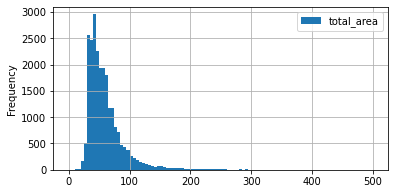

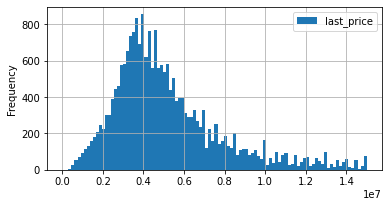

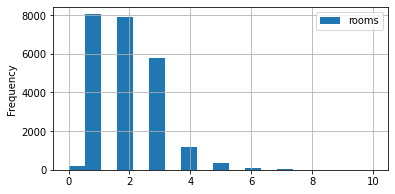

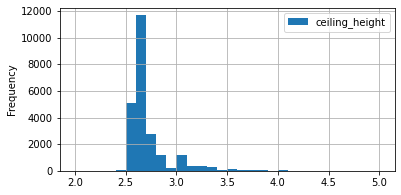

In [32]:
#общая площадь
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (6,3), range = (0,500))
display('#общая площадь',
        df['total_area'].describe())
#цена
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (6,3))
display('#цена',
        df['last_price'].describe())

#число комнат
df.plot(y = 'rooms', kind = 'hist',range=(0,10), bins = 19, grid=True, figsize = (6,3))
display('#число комнат',
        df['rooms'].describe())

#высота потолков
df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (6,3))
display('#высота потолков',
        df['ceiling_height'].describe())
#с данными все впорядке


**Общая площадь:**
Данные распределены нормально, есть выбросы но они не сильно влияют на данные.

**Цена:**
Данные также распределены нормально, видны выбросы, но они также не сильно влияют на результат, общая картина ясна. 

**Число комнат:**
На гистограмме видно, что бóльшее кол-во объявлений – это квартиры с 1 или 2 комнатами. Квартир с 7 комнатами как и ожидалось меньше всех. Распределение нормальное. 

**Высота потолков:**
Выбросы не сильно влияют на распределение. Данные нормальные и представляют собой понятную картину относительно высоты потолков. 

**Время продажи квартиры. Построение гистограммы.**
+ медиана
+ среднее

'#время продаж'

count   23,650.00
mean     2,017.37
std          1.04
min      2,014.00
25%      2,017.00
50%      2,017.00
75%      2,018.00
max      2,019.00
Name: year_of_publication, dtype: float64

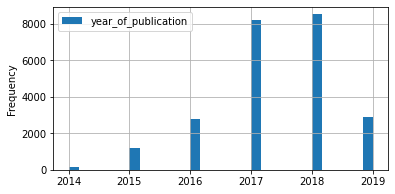

In [33]:
#время продаж
df.plot(y = 'year_of_publication', kind = 'hist', bins = 30, grid=True, figsize = (6,3))
display('#время продаж',
        df['year_of_publication'].describe())


count   20,470.00
mean       180.75
std        219.78
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

'медиана'

95.0

'выбивающиеся значения'

45.00       879
60.00       538
7.00        234
30.00       208
90.00       203
           ... 
969.00        1
1.00          1
1,147.00      1
1,148.00      1
1,174.00      1
Name: days_exposition, Length: 1141, dtype: int64

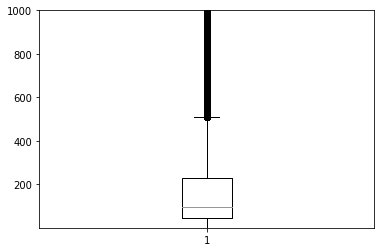

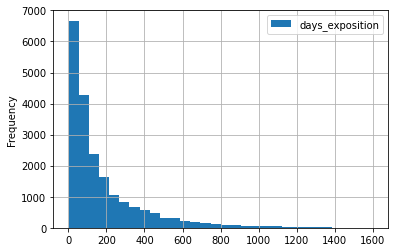

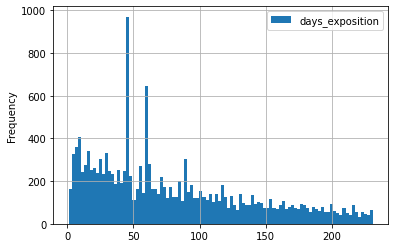

In [34]:
#диаграмма размаха
import matplotlib.pyplot as plt
plt.boxplot(df[df['days_exposition']>0]['days_exposition'])
plt.ylim(1,1000)

df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,231))

display(df[df['days_exposition']!=0]['days_exposition'].describe()) #среднее значение + квартили
display('медиана',
        df[df['days_exposition']!=0]['days_exposition'].median()) #медиана
display('выбивающиеся значения',
        df[df['days_exposition']!=0]['days_exposition'].value_counts()) #выбивающиеся значения



На данных графиках видно, что распределение равномерное, с редкими выбросами. 
Среднее значение равняется 180 дням, а медиана равна 95 дням. 
Выявлены выбивающиеся значения и методом value_counts подтверждаем это - аномалии находятся на 45, 60, 7, 30, 90 днях. 
Данные аномалии связаны с тем, что сроки публикации на яндексе соответсвуют этим дням. 
* Продажа комнаты - 45 дней
* Продажа дома, участка или гаража - 90 дней
* Аренда комнаты - 7 дней
* Аренда комнаты, участка или гаража - 30 дней
* Аренда и продажа коммерческого объекта - 60 дней
* Продажа квартиры: до 4,5 млн — 45 дней, от 4,5 до 10 млн — 60 дней, от 10 млн — 90 дней
* Аренда квартиры: до 20 тыс/м — 7 дней, от 20 до 40 тыс/м — 14 дней, от 40 тыс/м — 21 день
* Аренда посуточная: Квартира, Комната, Дом / участок, Гараж - 60 дней. 

На графике boxplot видно, что "нормальные" данные находятся в диапазоне 1 - 231, выбросы находятся на отметке 500 дней и больше. 
**Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**
Публикации снятые в первый день - являются быстрыми, те, что держатся 500 дней и больше - необычно долго. 
**Уберите редкие и выбивающиеся значения.**
Можно убрать значения, где квартиры продаются 500 дней и больше. 

In [35]:
display(len(df.query('days_exposition > 500'))/len(df)*100)

7.3742071881606766

Квартиры, продающиеся больше 500 дней составляют 7.37% от всего датасета, так что можно эти данные удалить. 

In [36]:
df.query('days_exposition > 500')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_kitchen,ratio_living,price_per_meter,day_of_publication,month_of_publication,month_of_publication_id,year_of_publication,floor_id
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,"3,180.02",4,False,False,False,"1,049.28",0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,14.82,61.25,"92,785.71",20,August,8,2015,другой
17,6,"4,180,000.00",36.00,2016-09-09,1,2.65,17.00,"2,044.30",7,False,False,False,674.54,1.00,Санкт-Петербург,"33,564.00","14,616.00",0.00,NaN,1.00,859.00,571.00,30.56,45.83,"116,111.11",9,September,9,2016,другой
23,11,"2,950,000.00",32.00,2016-10-29,1,2.60,9.00,"1,817.15",9,False,False,False,599.59,0.00,Санкт-Петербург,"15,414.00","14,211.00",2.00,517.00,1.00,190.00,615.00,19.06,55.31,"92,187.50",29,October,10,2016,последний
35,6,"15,500,000.00",149.00,2017-06-26,5,2.65,5.00,"8,461.11",4,False,False,False,"2,791.84",0.00,Санкт-Петербург,"23,670.00","3,502.00",0.00,NaN,1.00,779.00,644.00,11.41,69.80,"104,026.85",26,June,6,2017,другой
42,13,"22,000,000.00",161.80,2015-07-08,4,2.80,4.00,"9,187.97",2,False,False,False,"3,031.67",5.00,Петергоф,"35,416.00","30,605.00",2.00,47.00,1.00,907.00,987.00,10.88,50.00,"135,970.33",8,July,7,2015,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23664,5,"9,000,000.00",110.00,2015-12-10,4,3.36,7.00,"6,246.46",5,False,False,False,"2,061.09",0.00,Санкт-Петербург,"26,313.00","5,016.00",3.00,417.00,1.00,118.00,816.00,14.36,58.73,"81,818.18",10,December,12,2015,другой
23672,5,"3,000,000.00",30.80,2016-06-08,1,2.65,5.00,"1,749.01",3,False,False,False,577.10,0.00,Санкт-Петербург,"44,614.00","14,193.00",2.00,258.00,0.00,NaN,808.00,20.45,52.27,"97,402.60",8,June,6,2016,другой
23675,8,"3,550,000.00",39.50,2016-10-03,1,2.65,16.00,"2,243.05",13,False,False,False,740.12,0.00,Санкт-Петербург,"25,740.00","14,951.00",0.00,NaN,0.00,NaN,721.00,21.52,48.10,"89,873.42",3,October,10,2016,другой
23691,11,"9,470,000.00",72.90,2016-10-13,2,2.75,25.00,"4,139.70",7,False,False,False,"1,365.94",1.00,Санкт-Петербург,"19,424.00","4,489.00",0.00,NaN,1.00,806.00,519.00,14.54,55.28,"129,903.98",13,October,10,2016,другой


In [37]:
df = df[df['days_exposition'] < 500] #оставляем в датасете строки, где кол-во дней публикации <500
df = df.reset_index(drop=True) #обновляем индексы, чтобы они шли по порядку
df #проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_kitchen,ratio_living,price_per_meter,day_of_publication,month_of_publication,month_of_publication_id,year_of_publication,floor_id
0,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,"2,294.15",1,False,False,False,756.98,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,27.23,46.04,"82,920.79",4,December,12,2018,первый
1,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,"9,028.97",9,False,False,False,"2,979.21",0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,NaN,NaN,"408,176.10",24,July,7,2015,другой
2,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,"5,678.60",13,False,False,False,"1,873.72",0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,41.00,32.00,"100,000.00",19,June,6,2018,другой
3,10,"2,890,000.00",30.40,2018-09-10,1,2.65,12.00,"1,726.29",5,False,False,False,569.61,0.00,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,29.93,47.37,"95,065.79",10,September,9,2018,другой
4,6,"3,700,000.00",37.30,2017-11-02,1,2.65,26.00,"2,118.12",6,False,False,False,698.90,1.00,поселок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00,38.61,28.42,"99,195.71",2,November,11,2017,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18716,13,"3,550,000.00",35.30,2018-02-28,1,2.86,15.00,"2,004.55",4,False,False,False,661.42,2.00,Санкт-Петербург,"17,284.00","16,081.00",1.00,353.00,2.00,652.00,29.00,25.78,46.18,"100,566.57",28,February,2,2018,другой
18717,3,"5,500,000.00",52.00,2018-07-19,2,2.65,5.00,"2,952.87",2,False,False,False,974.33,0.00,Санкт-Петербург,"20,151.00","6,263.00",1.00,300.00,0.00,NaN,15.00,11.54,59.62,"105,769.23",19,July,7,2018,другой
18718,2,"1,350,000.00",30.00,2017-07-07,1,2.65,5.00,"1,703.58",4,False,False,False,562.11,0.00,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.00,20.00,58.33,"45,000.00",7,July,7,2017,другой
18719,9,"4,600,000.00",62.40,2016-08-05,3,2.60,9.00,"3,543.45",8,False,False,False,"1,169.20",0.00,Петергоф,"45,602.00","34,104.00",1.00,352.00,1.00,675.00,239.00,12.82,64.10,"73,717.95",5,August,8,2016,другой


**Зависит ли цена от площади, числа комнат, удалённости от центра, этажности и даты размещения.**

ЦЕНА – ПЛОЩАДЬ

,mean,count,median
total_area,,,
100.00,"12,337,632.63",49,"12,100,000.00"
95.00,"9,817,610.22",46,"9,750,000.00"
90.00,"10,707,076.47",60,"8,775,000.00"
85.00,"9,015,030.97",59,"8,600,000.00"
77.00,"8,413,531.91",47,"7,500,000.00"
...,...,...,...
31.00,"2,892,364.86",296,"3,000,000.00"
29.00,"2,757,695.65",69,"3,000,000.00"
32.00,"2,922,886.88",248,"3,000,000.00"


,mean,count,median
total_area,,,
12.00,"2,400,000.00",1,"2,400,000.00"
13.00,"2,350,000.00",3,"1,850,000.00"
13.20,"1,686,000.00",1,"1,686,000.00"
14.00,"1,190,000.00",1,"1,190,000.00"
15.00,"1,725,000.00",2,"1,725,000.00"
...,...,...,...
495.00,"91,500,000.00",1,"91,500,000.00"
500.00,"190,000,000.00",2,"190,000,000.00"
590.00,"65,000,000.00",1,"65,000,000.00"


0.627198065603863

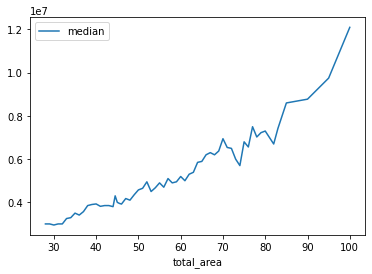

In [38]:
pivot_table_area = df.pivot_table(
    index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_area.columns = ['mean', 'count', 'median']
display(pivot_table_area.query(
    'count > 40').sort_values('median', ascending = False))
pivot_table_area.query(
    'count > 40').plot(y = 'median') #не включаем единичные случаи, чтобы картина была правдоподобнее


display(pivot_table_area)
df['total_area'].corr(df['last_price'])


На графике видна зависисмость между последней стоимостью и площадью помещения. Чем больше площадь помещения, тем выше цена. 
Коэффицент Пирсона равен 0.627, что говорит о достаточно высокой корреляции между площадью и ценой.

ЦЕНА – ЧИСЛО КОМНАТ

,mean,count,median
rooms,,,
7,"191,922.70",34,"111,552.67"
0,"107,439.92",175,"105,058.37"
6,"155,674.33",63,"100,529.10"
1,"99,752.23",6770,"99,710.52"
5,"129,289.12",197,"94,117.65"
2,"93,485.87",6377,"91,666.67"
4,"104,606.31",787,"88,888.89"
3,"94,399.47",4301,"87,500.00"


,mean,count,median
rooms,,,
0,"107,439.92",175,"105,058.37"
1,"99,752.23",6770,"99,710.52"
2,"93,485.87",6377,"91,666.67"
3,"94,399.47",4301,"87,500.00"
4,"104,606.31",787,"88,888.89"
5,"129,289.12",197,"94,117.65"
6,"155,674.33",63,"100,529.10"
7,"191,922.70",34,"111,552.67"
8,"196,426.16",7,"116,056.49"


0.040190927983468155

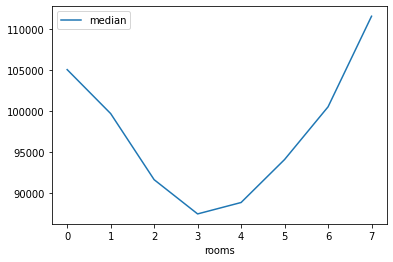

In [39]:
pivot_table_area = df.pivot_table(
    index = 'rooms', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_area.columns = ['mean', 'count', 'median']

display(pivot_table_area.query(
    'count > 30').sort_values('median', ascending = False))
pivot_table_area.query(
    'count > 30').plot(y = 'median') #не включаем единичные случаи, чтобы картина была правдоподобнее


display(pivot_table_area)
df['rooms'].corr(df['price_per_meter'])



На данном графике видно, что цена за квадратный метр уменьшается, приближаясь к отметке в "3 комнаты", затем цена за квадратный метр опять возрастает. Цена за квадратный метр в 3-ех и 4-ех комнатных квартирах примерно одинаковая. 
Коэффицент Пирсона, равный 0,04 говорит о том, что нет прямой зависимости между показателем цены за квадратный метр и числом комнат в квартире. 

ЦЕНА – УДАЛЕННОСТЬ ОТ ЦЕНТРА

-0.31387917174065094

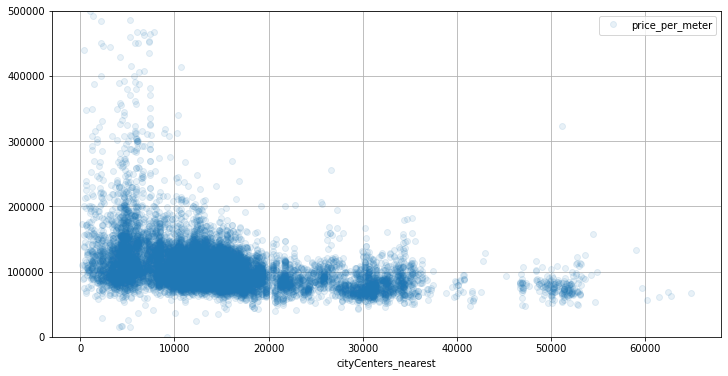

In [40]:
df.plot(x = 'cityCenters_nearest', #график взаимосвязи цены и удаленности от центра
        y = 'price_per_meter',
        style = 'o', 
        alpha=0.1,
        ylim = (0,500000), 
        grid=True, 
        figsize=(12,6))
df['price_per_meter'].corr(df['cityCenters_nearest']) #коэфф Пирсона

На данном графике видно, что цена варьируется от месторасположения квартиры. Цены в диапазоне от 0 до 10 км варьируются от примерно 30 тысяч до 500 тысяч за квадратный метр, от 10 км до 20 км такие большие значения цены уже не встречаются, чем квартира дальше от центра, тем меньше стоимость квадратного метра. Сгустки точек показывают наиболее встречаемые значения для удаленности квартиры от центра. Однако на графике видно, что есть и аномалии, к примеру квартира, находящаяся более чем в 50 км от города имеет цену больше 300 тысяч рублей за квадратный метр.
Данные наблюдения подкрепляются коэффицентом Пирсона -0,31, что говорит об отрицательной корреляции. Дальше от центра - цена ниже. 

ЦЕНА – ЭТАЖ

,mean,count,median
floor_id,,,
другой,"101,146.16",13950,"96,958.13"
первый,"80,211.87",2229,"80,434.78"
последний,"91,792.65",2542,"87,321.68"


0.13943377262005777

,mean,count,median
floor,,,
1,"80,211.87",2229,"80,434.78"
27,"92,476.74",10,"87,916.21"
2,"92,372.11",2607,"89,393.94"
5,"95,131.89",2037,"90,476.19"
26,"94,099.20",21,"90,837.28"


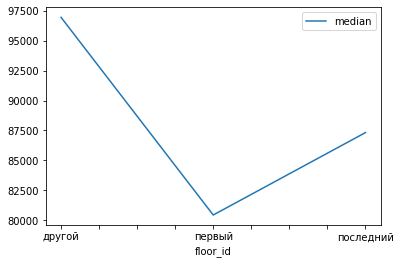

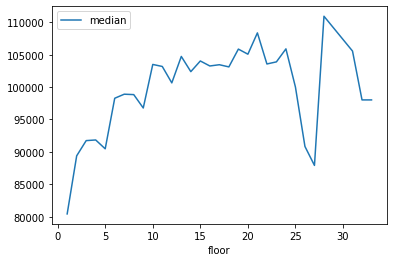

In [41]:
pivot_table_floor_id = df.pivot_table(
    index = 'floor_id', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_id.columns = ['mean', 'count', 'median'] #избавление от мультииндекса
pivot_table_floor_id.plot(y = 'median')
pivot_table_floor = df.pivot_table(
    index = 'floor', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor.columns = ['mean', 'count', 'median'] #избавление от мультииндекса
pivot_table_floor.plot(y = 'median') #график по медиане

display(pivot_table_floor_id)
display(df['floor'].corr(df['price_per_meter'])) #кореляция
pivot_table_floor.sort_values(by='median').head() #поиск аномалий


Корреляция между этажом и ценой существует, но небольшая, это доказывает коэффицент Пирсона, который равен 0,14. Первый этаж является самым дешевым. Последние этажи дороже первых, но обычно не намного. Дорогими являются другие этажи. Исключение составляют 27 и 26 этажи. 

ЦЕНА – ДЕНЬ НЕДЕЛИ

In [42]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

,mean,count,median
weekday_exposition,,,
0,"6,080,634.20",2794,"4,500,000.00"
1,"5,907,929.73",3286,"4,500,000.00"
2,"6,135,319.93",3092,"4,500,000.00"
3,"6,027,632.55",3399,"4,500,000.00"
5,"6,896,046.10",1539,"4,500,000.00"
4,"5,821,611.93",3256,"4,449,500.00"
6,"5,887,120.47",1355,"4,400,000.00"


0.004683785127706731

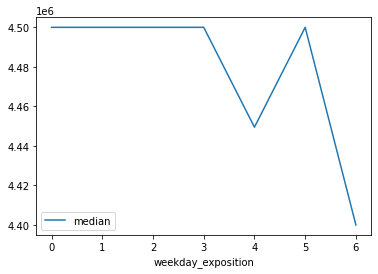

In [43]:
pivot_table_weekday = df.pivot_table(
    index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday.columns = ['mean', 'count', 'median']
display(pivot_table_weekday.sort_values('median', ascending = False))
pivot_table_weekday.plot(y = 'median') #используем медиану чтобы избежать аномалий
df['weekday_exposition'].corr(df['last_price'])


Четкой взаимосвязи между днем недели и ценой объекта нет, можно разве что утверждать, что в воскресенье цена на объект ниже, чем в любой другой день. 

ЦЕНА — ДЕНЬ

,mean,count,median
day_of_publication,,,
29,"6,077,332.16",522,"4,750,000.00"
4,"7,021,037.73",528,"4,700,000.00"
27,"6,208,120.72",623,"4,700,000.00"
12,"6,477,823.66",675,"4,690,000.00"
23,"5,986,728.83",541,"4,600,000.00"
10,"6,946,935.94",922,"4,600,000.00"
13,"6,256,435.49",696,"4,597,500.00"
16,"6,169,382.34",604,"4,500,000.00"
18,"6,385,449.00",595,"4,500,000.00"


0.006729327386885107

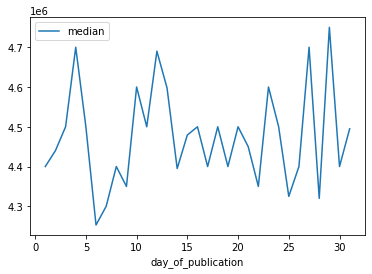

In [44]:
pivot_table_day = df.pivot_table(
    index = 'day_of_publication', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_day.columns = ['mean', 'count', 'median']
display(pivot_table_day.sort_values('median', ascending = False))
pivot_table_day.plot(y = 'median') 
df['day_of_publication'].corr(df['last_price'])


Зависимости между ценой и днем публикации нет, данные сильно разнятся, четких закономерностей не обнаружено. 

ЦЕНА — МЕСЯЦ

,mean,count,median
month_of_publication_id,,,
9,"6,549,644.43",1716,"4,594,500.00"
11,"6,088,903.24",2010,"4,590,000.00"
2,"6,005,856.72",2123,"4,500,000.00"
4,"6,570,948.13",1373,"4,500,000.00"
7,"6,288,002.61",1457,"4,500,000.00"
8,"5,757,163.78",1510,"4,500,000.00"
1,"5,796,617.29",1169,"4,499,999.00"
5,"6,219,395.67",1005,"4,450,000.00"
10,"5,656,071.19",1806,"4,450,000.00"


0.0039736177292967415

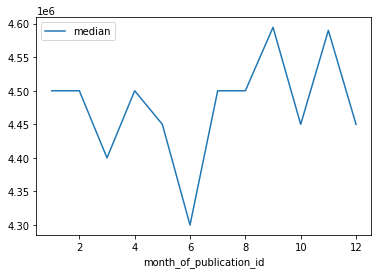

In [45]:
pivot_table_month = df.pivot_table(
    index = 'month_of_publication_id', 
    values = 'last_price', 
    aggfunc = ['mean', 'count', 'median']) #используем колонку _id чтобы не выдавало ошибку
pivot_table_month.columns = ['mean', 'count', 'median']
display(pivot_table_month.sort_values('median', ascending = False))
pivot_table_month.plot(y = 'median') 
df['month_of_publication_id'].corr(df['last_price'])


Зависимость между месяцами и ценой объекта также не выявлена, но можно утверждать, что в июне квартиры выставляются по меньшей цене, чем в остальные месяцы. 

ЦЕНА — ГОД

,mean,count,median
year_of_publication,,,
2019,"5,868,533.57",1083,"4,789,500.00"
2015,"7,091,865.97",443,"4,750,000.00"
2016,"6,489,312.46",2071,"4,490,000.00"
2018,"5,611,383.07",7554,"4,490,000.00"
2017,"6,351,550.94",7570,"4,450,000.00"


-0.03328007599953367

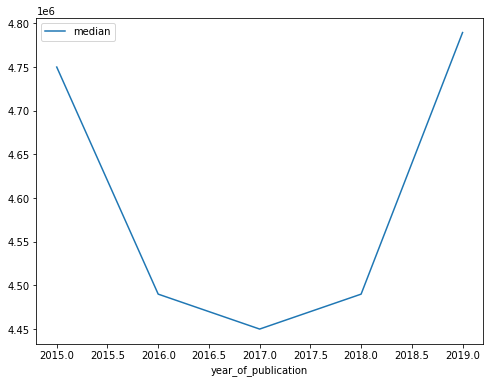

In [46]:
pivot_table_year = df.pivot_table(
    index = 'year_of_publication', 
    values = 'last_price', 
    aggfunc = ['mean', 'count', 'median']) #используем колонку _id чтобы не выдавало ошибку
pivot_table_year.columns = ['mean', 'count', 'median']
display(pivot_table_year.sort_values('median', ascending = False))
pivot_table_year.plot(y = 'median', figsize=(8,6)) 
df['year_of_publication'].corr(df['last_price'])


На данном графике видно, что в 2016, 2017 и 2018 году цены на квартиры были гораздо ниже, чем в 2015 или в 2019 году. Корреляция не обнаружена между показателями "цена" и "год". Нет линейной зависимости. 

**10 населённых пунктов с наибольшим числом объявлений** 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_kitchen,ratio_living,price_per_meter,day_of_publication,month_of_publication,month_of_publication_id,year_of_publication,floor_id,weekday_exposition
locality_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Санкт-Петербург,12417,12417,12417,12417,12417,12417,12363,12417,12417,12417,12417,12417,12417,12417,12374,12393,12393,5605,12393,6189,12417,11272,11483,12417,12417,12417,12417,12417,12417,12417
поселок Мурино,517,517,517,517,517,517,513,517,517,517,517,517,517,517,2,2,2,0,2,2,517,417,458,517,517,517,517,517,517,517
поселок Шушары,385,385,385,385,385,385,384,385,385,385,385,385,385,385,381,381,381,0,381,131,385,348,354,385,385,385,385,385,385,385
Всеволожск,308,308,308,308,308,308,308,308,308,308,308,308,308,308,0,0,0,0,0,0,308,272,283,308,308,308,308,308,308,308
Колпино,293,293,293,293,293,293,293,293,293,293,293,293,293,293,292,292,292,116,292,162,293,277,283,293,293,293,293,293,293,293
поселок Парголово,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,10,287,50,287,250,262,287,287,287,287,287,287,287
Пушкин,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,154,278,131,278,250,257,278,278,278,278,278,278,278
деревня Кудрово,266,266,266,266,266,266,266,266,266,266,266,266,266,266,0,0,0,0,0,0,266,202,232,266,266,266,266,266,266,266
Гатчина,244,244,244,244,244,244,244,244,244,244,244,244,244,244,0,0,0,0,0,0,244,231,230,244,244,244,244,244,244,244


<AxesSubplot:>

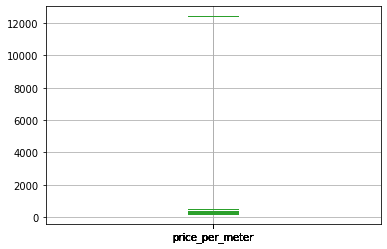

In [47]:
top_10 = df.groupby('locality_name').count().sort_values(by='last_price', ascending=False).head(10)
display(top_10)
top_10.query('locality_name == "Санкт-Петербург"').boxplot(column='price_per_meter')
top_10.query('locality_name == "поселок Мурино"').boxplot(column='price_per_meter')
top_10.query('locality_name == "поселок Шушары"').boxplot(column='price_per_meter')
top_10.query('locality_name == "Всеволожск"').boxplot(column='price_per_meter')
top_10.query('locality_name == "Колпино"').boxplot(column='price_per_meter')
top_10.query('locality_name == "поселок Парголово"').boxplot(column='price_per_meter')
top_10.query('locality_name == "Пушкин"').boxplot(column='price_per_meter')
top_10.query('locality_name == "деревня Кудрово"').boxplot(column='price_per_meter')
top_10.query('locality_name == "Гатчина"').boxplot(column='price_per_meter')
top_10.query('locality_name == "Выборг"').boxplot(column='price_per_meter')

,count
locality_name,
Санкт-Петербург,12417
поселок Мурино,517
поселок Шушары,385
Всеволожск,308
Колпино,293
поселок Парголово,287
Пушкин,278
деревня Кудрово,266
Гатчина,244


'ящик с усами по параметру count'

<AxesSubplot:>

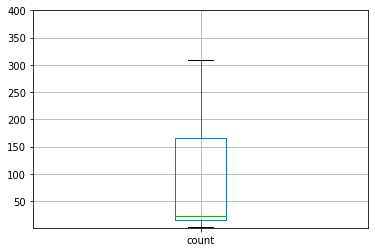

'count + mean price per meter'

,count,mean
locality_name,,
Санкт-Петербург,12417,"111,591.48"
поселок Мурино,517,"85,983.77"
поселок Шушары,385,"77,938.48"
Всеволожск,308,"68,605.62"
Колпино,293,"74,779.51"
поселок Парголово,287,"89,186.22"
Пушкин,278,"101,894.61"
деревня Кудрово,266,"92,656.98"
Гатчина,244,"68,065.18"


'ящик с усами по средней цене за квадратный метр'

<AxesSubplot:>

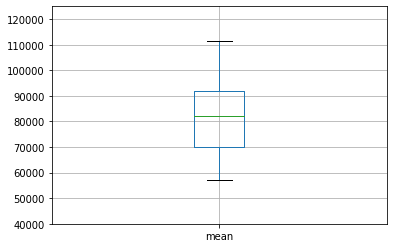

In [48]:
pivot_table_city = df.pivot_table(
    index = 'locality_name', 
    values = 'first_day_exposition', 
    aggfunc = ['count'])
pivot_table_city.columns = ['count']
display(pivot_table_city.sort_values(
    by='count',ascending=False).head(10)) #топ 10 городов по кол-ву публикаций

pivot_table_price_per_meter = df.pivot_table(
    index = 'locality_name', 
    values = 'price_per_meter', 
    aggfunc = ['mean'])
pivot_table_price_per_meter.columns = ['mean']
pivot_table_price_per_meter.sort_values(by='mean',ascending=False).head(10)

pivot_table_city.join(
    pivot_table_price_per_meter).sort_values(by='count',ascending=False).head(10)
pivot_table_city.join(pivot_table_price_per_meter)
display('ящик с усами по параметру count',
        pivot_table_city.head(10).boxplot(column='count'))
plt.ylim(1,400)
plt.show()
display('count + mean price per meter',
        pivot_table_city.join(
    pivot_table_price_per_meter).sort_values(
    by='count',ascending=False).head(10))
display('ящик с усами по средней цене за квадратный метр',
        pivot_table_city.join(
    pivot_table_price_per_meter).sort_values(
    by='count',ascending=False).head(10).boxplot(column='mean'))
plt.ylim(40000,125000)
plt.show()

(0.0, 200000.0)

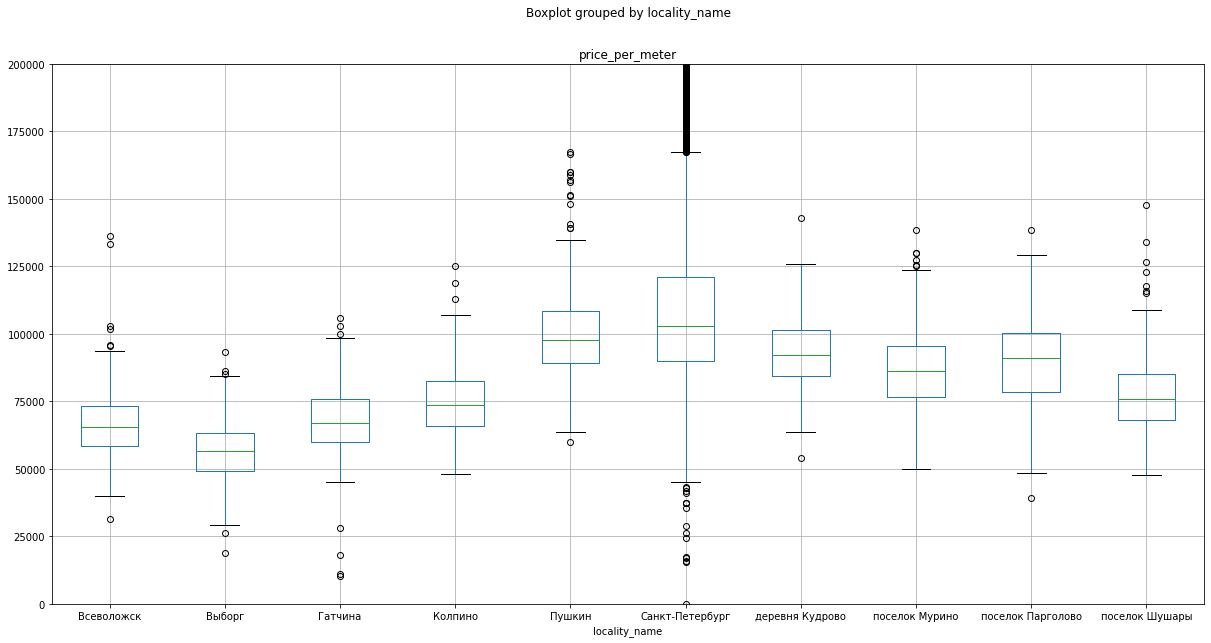

In [49]:

top_locality = pivot_table_city.sort_values(by='count',ascending=False).head(10)

ax = (df
    .query('locality_name in @top_locality.index')
    .boxplot('price_per_meter', by='locality_name', figsize=(20, 10))
)
ax.set_ylim(0, 200000)

**Населённые пункты с самой высокой и низкой стоимостью жилья.**

In [50]:
pivot_table_min_max = df.pivot_table(
    index = 'locality_name', 
    values = 'price_per_meter', 
    aggfunc = ['mean','median'])
pivot_table_min_max.columns = ['mean','median']
display('самые дешевые объекты находятся в',
        pivot_table_min_max[pivot_table_min_max['mean'] == pivot_table_min_max['mean'].min()])
display('самые дорогие объекты находятся в',
        pivot_table_min_max[pivot_table_min_max['mean'] == pivot_table_min_max['mean'].max()])


'самые дешевые объекты находятся в'

,mean,median
locality_name,,
деревня Старополье,"11,206.22","11,000.00"


'самые дорогие объекты находятся в'

,mean,median
locality_name,,
поселок Лисий Нос,"113,728.35","113,728.35"


**Область, входящая в центр**

,last_price
cityCenters_nearest_km,
0,"21,199,806.45"
1,"18,426,415.58"
2,"14,722,714.19"
3,"13,078,531.40"
4,"12,352,993.29"
5,"14,265,987.59"
6,"12,301,243.66"
7,"12,832,659.21"
8,"7,634,047.24"


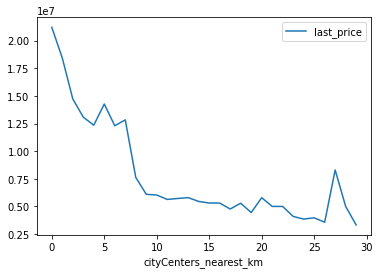

In [51]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(500)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')
pivot_table_center = df.query(
    'locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=500').pivot_table(
    index = 'cityCenters_nearest_km', 
    values = 'last_price', 
    aggfunc = 'mean')
pivot_table_center.plot()
pivot_table_center


Цена сильно меняется после 7 километров. Следовательно назначим центр в радиусе 7 км. 

**Анализ объектов, находящихся в центре Петербурга**

'максимальная цена за комнаты'

,mean,count,median
rooms,,,
7,"63,225,161.29",31,"23,000,000.00"
6,"42,180,041.65",51,"19,500,000.00"
5,"29,194,853.20",137,"14,500,000.00"
4,"18,265,938.81",317,"11,359,000.00"
3,"13,619,064.30",796,"9,400,000.00"
2,"8,797,783.39",835,"7,250,000.00"
1,"6,433,545.56",438,"5,789,500.00"
0,"8,417,875.00",16,"3,830,000.00"


'min & max цена в центре Петербурга'

1600000.0

763000000.0

'влияние цены на кол-во комнат'

0.03949652760420224

'влияние цены на этажность'

0.12243708630770264

'влияние цены на удаленность от центра'

-0.030087440223621236

'день недели'

,mean,count,median
weekday_exposition,,,
5,"157,502.21",223,"127,472.53"
6,"143,049.50",155,"125,000.00"
2,"139,557.17",423,"122,876.71"
0,"139,691.76",394,"122,385.62"
4,"138,023.91",450,"121,841.97"
1,"137,343.39",442,"117,259.86"
3,"134,964.07",534,"116,384.94"


'месяц'

,mean,count,median
month_of_publication_id,,,
3,"142,025.68",243,"131,428.57"
1,"141,596.81",132,"125,000.00"
8,"137,395.75",215,"124,780.32"
9,"144,968.49",254,"123,366.35"
11,"137,270.12",294,"120,849.42"
2,"138,414.26",285,"120,000.00"
12,"137,338.27",181,"119,289.34"
7,"143,816.03",222,"118,065.27"
10,"129,286.50",218,"117,196.58"


'месяц'

,mean,count,median
year_of_publication,,,
2019,"147,215.37",126,"134,872.51"
2018,"136,918.53",903,"122,448.98"
2017,"140,334.99",1146,"119,767.44"
2016,"141,166.73",357,"115,000.00"
2015,"144,351.39",89,"109,900.00"


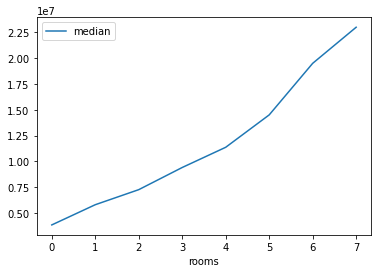

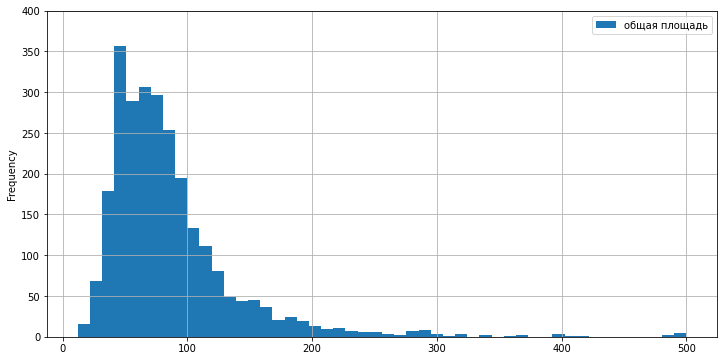

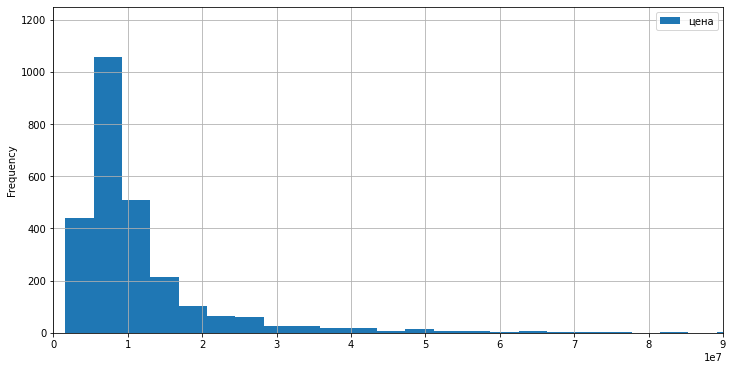

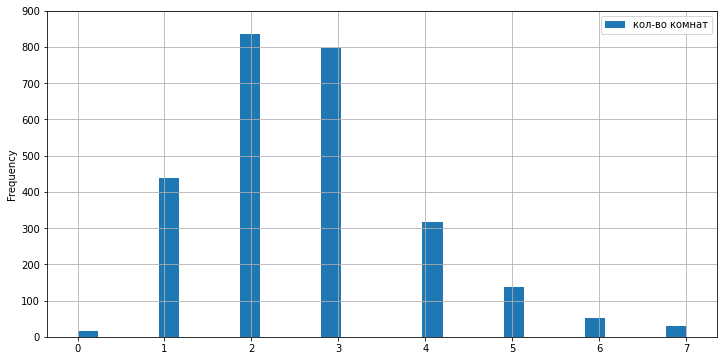

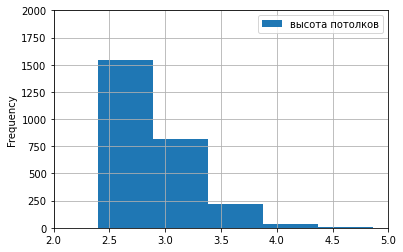

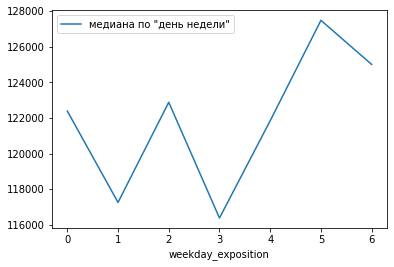

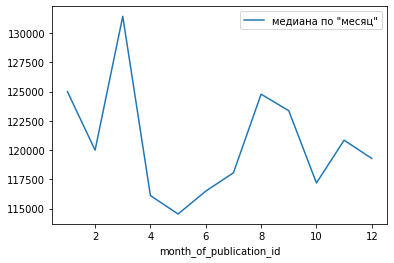

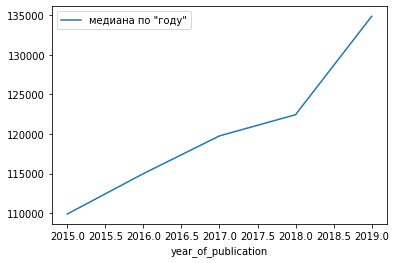

In [52]:
spb_center = df.query(
    'cityCenters_nearest_km <= 7 and locality_name == "Санкт-Петербург" and rooms <= 7')
pivot_table_area_spb_center = spb_center.pivot_table(
    index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_area_spb_center.columns = ['mean', 'count', 'median']
display('максимальная цена за комнаты',
        pivot_table_area_spb_center.query(
    'count > 10').sort_values('median', ascending = False))
pivot_table_area_spb_center.plot(y = 'median') 

display(
'min & max цена в центре Петербурга',
min(spb_center.last_price),
max(spb_center.last_price))

spb_center.query('total_area < 600').plot(y = 'total_area',
                kind='hist',
                label='общая площадь',
                style = 'o', 
                bins=50,
                ylim = (0,400), 
                grid=True, 
                figsize=(12,6))

spb_center.plot(y = 'last_price',
                kind='hist',
                label='цена',
                style = 'o', 
                bins=200,
                ylim = (0,1250), 
                xlim = (0, 90000000),
                grid=True, 
                figsize=(12,6))

spb_center.plot(y = 'rooms',
                kind='hist',
                label='кол-во комнат',
                style = 'o', 
                bins=30,
                ylim = (0,900), 
                grid=True, 
                figsize=(12,6))


spb_center.plot(y = 'ceiling_height',
                kind='hist',
                label='высота потолков',
                style = 'o', 
                bins=50,
                ylim = (0,2000), 
                xlim = (2,5),
                grid=True, 
                figsize=(6,4))
display(
    'влияние цены на кол-во комнат',
    spb_center.rooms.corr(spb_center.price_per_meter))

display(
    'влияние цены на этажность',
    spb_center.floor.corr(spb_center.price_per_meter))

display(
    'влияние цены на удаленность от центра',
    spb_center.cityCenters_nearest.corr(spb_center.price_per_meter))

spb_center_weekday = spb_center.pivot_table(
    index = 'weekday_exposition', 
    values = 'price_per_meter', 
    aggfunc = ['mean', 'count', 'median'])
spb_center_weekday.columns = ['mean', 'count', 'median']
spb_center_weekday.plot(
    y = 'median', 
    label='медиана по "день недели"')

display(
    'день недели',
    spb_center_weekday.sort_values('median', ascending = False))

spb_center_month = spb_center.pivot_table(
    index = 'month_of_publication_id', 
    values = 'price_per_meter', 
    aggfunc = ['mean', 'count', 'median'])
spb_center_month.columns = ['mean', 'count', 'median']
spb_center_month.plot(
    y = 'median', 
    label='медиана по "месяц"')

display(
    'месяц',
    spb_center_month.sort_values('median', ascending = False))

spb_center_year = spb_center.pivot_table(
    index = 'year_of_publication', 
    values = 'price_per_meter', 
    aggfunc = ['mean', 'count', 'median'])
spb_center_year.columns = ['mean', 'count', 'median']
spb_center_year.plot(
    y = 'median', 
    label='медиана по "году"')

display(
    'месяц',
    spb_center_year.sort_values('median', ascending = False))
#число комнат, этаж, удалённость от центра, дата размещения объявления

**Сравнение показателей между квартирами, находящимися в центре Петербурга и всеми квартирами в датафрейме, включая квартиры в центре Петербурга**

* Площадь

На графике общей площади видно, что в общем датафрейме большинство квартир имеют от 30 до 70 квадратных метров, в то время как в центре Петербурга (далее спб) в основном квартиры имеют от 40 до 100 квадратных метров. Распределение (общий вид) на обоих графиках схож. 

* Цена

В общем датафрейме большинстов квартир продаются по цене от 2 млн до 7 млн рублей. Большинство квартир в спб стоят до 130 млн. 

* Кол-во комнат. 

В общем датафрейме большинство квартир имеют 1 и 2 комнаты, в то время как в спб в основном продаются квартиры с 2 и 3 комнатами. 

* Высота потолков 

В целом можно сказать, что в спб потолки в среднем выше, чем в квартирах в общем датафрейме. 

## Общий вывод

Исследование было посвящено объявлениям о продажах квартир.

Работы:
1. Была получена первоначальная информация по датасету.
  - Обнаружены пропуски в датасете, кол-во некоторых доходит до 88.29%. 
  - Кол-во столбцов с пропусками 14 (всего в датасете 22 столбца).
  - Явных дубликатов в датаесете не было обнаружено. 
  - Замечены аномалии, к примеру, минимальное значение потолка 1 метр, а максимальное 100 метров.
2. Найдены пропуски, дубликаты и аномалии в датасете. Была проведена работа по заполнению пропусков, удаление ненужных строк из датасета. Аномалии и дубликаты обработаны.
  - Заменены неявные дубликаты (раньше названия населенных пунктов повторялись из-за разной записи е-ё и так далее).
  - Столбец с датой приведен к округленному до дней и правильному форматам. 
  - Пропуски в столбце с высотой потолков заменены на медиану, кол-во аномалий 75. 
  - Убраны пропуски в столбце living area, они составляли ~8 процентов от датасета. 
  - Замена на булев тип данных в столбцах, где это необходимо. 
  - Пропуски в kitchen area исправлены на значение равное 18% от общей площади квартиры, что является медианным значением. 
  - Пропуски в living area исправлены на значение равное 56.48% от общей площади квартиры, что является медианным значением.
  - Удалены квартиры, которые продаются больше 500 дней, кол-во квартир от всего датасета составляет 7.37%.
3. В датафрейм добавлены новые показатели: 
  - отношение кухни и жилой площади к общей площади помещения, 
  - цена за кв метр, 
  - день, месяц и год публикации объявлений, 
  - категория этажа.
  - ***Общая площадь:*** 
    - Данные распределены нормально, есть выбросы но они не сильно влияют на данные.
  - ***Цена:***
    - Данные также распределены нормально, видны выбросы, но они также не сильно влияют на результат, общая картина ясна.
  - ***Число комнат:*** 
    - На гистограмме видно, что бóльшее кол-во объявлений – это квартиры с 1 или 2 комнатами. Квартир с 7 комнатами как и ожидалось меньше всех. Распределение нормальное.
  - ***Высота потолков:*** 
    - Выбросы не сильно влияют на распределение. Данные нормальные и представляют собой понятную картину относительно высоты потолков.
- Время продаж в основном приходится на 2017 и 2018 год (немного больше 8000 объявлений).


- Среднее значение длительности размещения квартиры на площадке Яндекса равняется 180 дням, а медиана равна 95 дням. Выявлены выбивающиеся значения. Аномалии находятся на 45, 60, 7, 30, 90 днях. Данные аномалии связаны с тем, что сроки публикации на яндексе соответсвуют этим дням.

  - Продажа комнаты - 45 дней
  - Продажа дома, участка или гаража - 90 дней
  - Аренда комнаты - 7 дней
  - Аренда комнаты, участка или гаража - 30 дней
  - Аренда и продажа коммерческого объекта - 60 дней
  - Продажа квартиры: до 4,5 млн — 45 дней, от 4,5 до 10 млн — 60 дней, от 10 млн — 90 дней
  - Аренда квартиры: до 20 тыс/м — 7 дней, от 20 до 40 тыс/м — 14 дней, от 40 тыс/м — 21 день
  - Аренда посуточная: Квартира, Комната, Дом / участок, Гараж - 60 дней.
4. Сделаны графики соотношений цены к другим показателям квартир
  - Корреляция **ЦЕНА-ПЛОЩАДЬ** = 0.627
    - Чем больше площадь помещения, тем выше цена.
  - Корреляция **ЦЕНА – ЧИСЛО КОМНАТ** = 0.04
    - цена за квадратный метр уменьшается, приближаясь к отметке в "3 комнаты", затем цена за квадратный метр опять возрастает. Цена за квадратный метр в 3-ех и 4-ех комнатных квартирах примерно одинаковая.
  - Корреляция **ЦЕНА – УДАЛЕННОСТЬ ОТ ЦЕНТРА** = -0.314
    - цена варьируется от месторасположения квартиры. Цены в диапазоне от 0 до 10 км варьируются от примерно 30 тысяч до 500 тысяч за квадратный метр, от 10 км до 20 км такие большие значения цены уже не встречаются (в основном от 50 тыс до 150 тыс руб), чем квартира дальше от центра, тем меньше стоимость квадратного метра. В датасете есть и аномалии, к примеру, квартира, находящаяся более чем в 50 км от города имеет цену больше 300 тысяч рублей за квадратный метр. Кол-во аномалий небольшое. 
  - Корреляция **ЦЕНА – ЭТАЖ** = 0.139
    - Первый этаж является самым дешевым. Последние этажи дороже первых, но обычно не намного. Дорогими являются другие этажи. Исключение составляют 27 и 26 этажи.
  - Корреляция **ЦЕНА – ДЕНЬ НЕДЕЛИ** = 0.005
    - Четкой взаимосвязи между днем недели и ценой объекта нет, можно разве что утверждать, что в воскресенье цена на объект ниже, чем в любой другой день.
  - Корреляция **ЦЕНА — ДЕНЬ МЕСЯЦА** = 0.007
    - Зависимости между ценой и днем публикации нет, данные сильно разнятся, четких закономерностей не обнаружено.
  - Корреляция **ЦЕНА — МЕСЯЦ** = 0.004
    - Зависимость между месяцами и ценой объекта также не выявлена, но можно утверждать, что в июне квартиры выставляются по меньшей цене, чем в остальные месяцы.
  - Корреляция **ЦЕНА — ГОД** = -0.033
    - В 2016, 2017 и 2018 году цены на квартиры были гораздо ниже, чем в 2015 или в 2019 году. Корреляция не обнаружена между показателями "цена" и "год". Нет линейной зависимости.
5. Выявлен топ 10 населенных пунктов по кол-ву объявлений. 
| Город  | Кол-во объявлений |
| ------------- | ------------- |
| Санкт-Петербург  | 12417  |
| поселок Мурино  | 517  |
| поселок Шушары  | 385  |
| Всеволожск  | 308  |
| Колпино  | 293  |
| поселок Парголово  | 287  |
| Пушкин  | 278  |
| деревня Кудрово  | 266  |
| Гатчина  | 244  |
| Выборг  | 193  |

* самые дешевые объекты находятся в деревне Старополье	11,206.22 (среднее)	11,000.00 (медиана)
* самые дорогие объекты находятся в поселке Лисий Нос	113,728.35 (среднее)	113,728.35 (медиана)
6. Сделан анализ квартир, находящихся в центре Санкт-Петербурга
  - минимальная & максимальная цена в центре Петербурга 1'600'000 и 763'000'000 руб соответственно  
  - Корреляция цены и кол-ва комнат 0.0395
  - Корреляция цены и этажности 0.122
  - Корреляция цены и удаленности от центра -0.03
7. Проведено сравнение квартир из общего датасета и квартир в центре СПб.
  - **Площадь**
    - В общем датафрейме большинство квартир имеют от 30 до 70 квадратных метров, в то время как в центре Петербурга в основном квартиры имеют от 40 до 100 квадратных метров. Распределение (общий вид) на графиках схожи.

  - **Цена**
    - В общем датафрейме большинстов квартир продаются по цене от 2 млн до 7 млн рублей. Большинство квартир в СПб стоят до 130 млн.

  - **Кол-во комнат**
    - В общем датафрейме большинство квартир имеют 1 и 2 комнаты, в то время как в СПб в основном продаются квартиры с 2 и 3 комнатами.

  - **Высота потолков**
    - В целом можно сказать, что в спб потолки в среднем выше, чем в квартирах в общем датафрейме.


**Итоги:** 

На стоимость квадратного метра квартиры больше всего влияют: общая площадь, этажность, расстояние до центра и год публикации.

Незначительно на стоимость квадратного метра влияют день, месяц и кол-во комнат. 

Центром Петербурга можно считать квартиры, находящиеся в радиусе 7 км.

Разница между общим датасетом и квартирами в центре СПб различается. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод